In [2]:
import os
import pandas as pd
import numpy as np

In [3]:
drivers_df = pd.read_csv('F1KaggleData/drivers.csv')
races_df = pd.read_csv('F1KaggleData/races.csv')
circuits_df = pd.read_csv('F1KaggleData/circuits.csv')
results_df = pd.read_csv('F1KaggleData/results.csv')


In [4]:
display(drivers_df.sample(5))
# display(races_df.head(5))
# display(circuits_df.head(5))
# display(results_df.head(5))


,driverId,driverRef,number,code,forename,surname,dob,nationality,url
45,46,bruni,NaN,NaN,Gianmaria,Bruni,30/05/1981,Italian,http://en.wikipedia.org/wiki/Gianmaria_Bruni
731,731,banks,NaN,NaN,Henry,Banks,14/06/1913,American,http://en.wikipedia.org/wiki/Henry_Banks
804,804,mantz,NaN,NaN,Johnny,Mantz,18/09/1918,American,http://en.wikipedia.org/wiki/Johnny_Mantz
784,784,hampshire,NaN,NaN,David,Hampshire,29/12/1917,British,http://en.wikipedia.org/wiki/David_Hampshire
259,260,andersson,NaN,NaN,Conny,Andersson,28/12/1939,Swedish,http://en.wikipedia.org/wiki/Conny_Andersson_(...


In [5]:
def drivers_with_wins():

    wins_df = results_df.loc[results_df['position'] == 1.0]
    return drivers_df.loc[drivers_df['driverId'].isin(wins_df['driverId'].unique())]

winners_df = drivers_with_wins()

display(winners_df.sample(8))

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
218,219,jabouille,NaN,NaN,Jean-Pierre,Jabouille,01/10/1942,French,http://en.wikipedia.org/wiki/Jean-Pierre_Jabou...
76,77,berger,NaN,NaN,Gerhard,Berger,27/08/1959,Austrian,http://en.wikipedia.org/wiki/Gerhard_Berger
122,123,boutsen,NaN,NaN,Thierry,Boutsen,13/07/1957,Belgian,http://en.wikipedia.org/wiki/Thierry_Boutsen
357,358,rindt,NaN,NaN,Jochen,Rindt,18/04/1942,Austrian,http://en.wikipedia.org/wiki/Jochen_Rindt
393,394,baghetti,NaN,NaN,Giancarlo,Baghetti,25/12/1934,Italian,http://en.wikipedia.org/wiki/Giancarlo_Baghetti
344,345,rodriguez,NaN,NaN,Pedro,RodrÌ_guez,18/01/1940,Mexican,http://en.wikipedia.org/wiki/Pedro_Rodr%C3%ADg...
220,221,depailler,NaN,NaN,Patrick,Depailler,09/08/1944,French,http://en.wikipedia.org/wiki/Patrick_Depailler
578,578,hawthorn,NaN,NaN,Mike,Hawthorn,10/04/1929,British,http://en.wikipedia.org/wiki/Mike_Hawthorn


In [6]:
# now lets see if we can break down by Nationality 

winners_by_nationality = winners_df['nationality'].value_counts()
display(winners_by_nationality)
winners_df['nationality'].value_counts().plot.pie(subplots=False)

British          19
Italian          15
American         15
French           12
German            7
Brazilian         6
Finnish           5
Australian        4
Swedish           3
Argentine         3
Austrian          3
Belgian           2
Swiss             2
Canadian          2
New Zealander     2
South African     1
Dutch             1
Mexican           1
Polish            1
Colombian         1
Venezuelan        1
Spanish           1
Name: nationality, dtype: int64

In [19]:
# get winners by Nationality 

import ipywidgets as widgets
from IPython.display import clear_output

def f1_winner_nationality_dropdown_eventhandler(change):

    with out:
        clear_output()
        
        winners_of_chosen_nationality_df = winners_df.loc[winners_df['nationality'] == change.new]
        display('User selection: {}. Number of Winners: {}'.format(change.new, len(winners_of_chosen_nationality_df)))
        display(winners_of_chosen_nationality_df)


nationalities = winners_df['nationality'].unique()
display(nationalities)

f1_winner_nationality_dropdown = widgets.Dropdown(
                                    options=nationalities,value='British',
                                    description='Select Nationality: ', disabled=False, )

display(f1_winner_nationality_dropdown)
out = widgets.Output()
display(out)

f1_winner_nationality_dropdown.observe(f1_winner_nationality_dropdown_eventhandler, names='value')

array(['British', 'German', 'Spanish', 'Finnish', 'Polish', 'Brazilian',
       'Italian', 'Australian', 'Colombian', 'Canadian', 'French',
       'Austrian', 'Belgian', 'Argentine', 'American', 'South African',
       'Swiss', 'Swedish', 'New Zealander', 'Mexican', 'Venezuelan',
       'Dutch'], dtype=object)

Dropdown(description='Select Nationality: ', options=('British', 'German', 'Spanish', 'Finnish', 'Polish', 'Br…

Output()

,NumOfWins
nationality,
British,267
German,173
Brazilian,101
French,79
Finnish,49
Italian,43
Austrian,41
Australian,40
Argentine,38


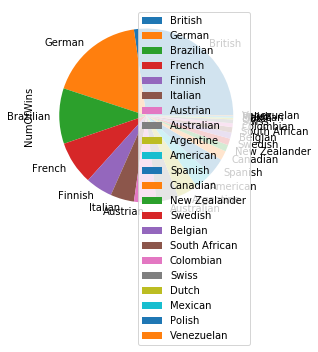

In [74]:
# Grand Prix won by each nationality 

winners_df = drivers_with_wins()

# display(winners_df.sample(8))

driver_ids = list(winners_df['driverId'])
# display(driver_ids)
# display(results_df.sample(10))

# num_of_wins_per_driver = df[~df.countries.isin(countries)]
all_wins = results_df.loc[results_df['positionText'] == '1']
wins_per_driver = all_wins.groupby('driverId')['positionText'].count().to_frame()
# wins_per_driver['driverId']  = wins_per_driver.index
# display(wins_per_driver)
wins_per_driver.reset_index(inplace=True)
#display(wins_per_driver)

merged_2 = pd.merge(winners_df, wins_per_driver)
merged_2.rename(columns={'positionText':'NumOfWins'}, inplace=True)
# display(merged_2.sample(10))

wins_per_nation = merged_2.groupby('nationality')['NumOfWins'].sum().to_frame()
# display(wins_per_nation)
wins_per_nation = wins_per_nation.sort_values(by=['NumOfWins'], ascending=[False])
display(wins_per_nation)
display(wins_per_nation.plot.pie(y='NumOfWins'))
